In [1]:
import sys, ta
sys.path.append("..")
from utils import Db
import pandas as pd
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from scipy.signal import argrelextrema

In [2]:
db = Db("../cache")
df = db.get_symbols_as_dataframe(['HPQ'])
df['date_time'] = pd.to_datetime(df['date_time'])
df = df[df['date_time'] > datetime.now() - timedelta(days=365)]
df = df.reset_index()
scatter_data = df[['unix_time', 'adjusted_close', 'date_time']].as_matrix()
dates = scatter_data[:, 2]

maxes = argrelextrema(df['adjusted_close'].as_matrix(), np.greater, order=5)
maxes_dates = dates[maxes[0]]
maxes_vals = scatter_data[maxes[0], 1]

mins = argrelextrema(df['adjusted_close'].as_matrix(), np.less, order=5)
mins_dates = dates[mins[0]]
mins_vals = scatter_data[mins[0], 1]

plt.rcParams["figure.figsize"] = [9, 6]
%matplotlib notebook

<IPython.core.display.Javascript object>


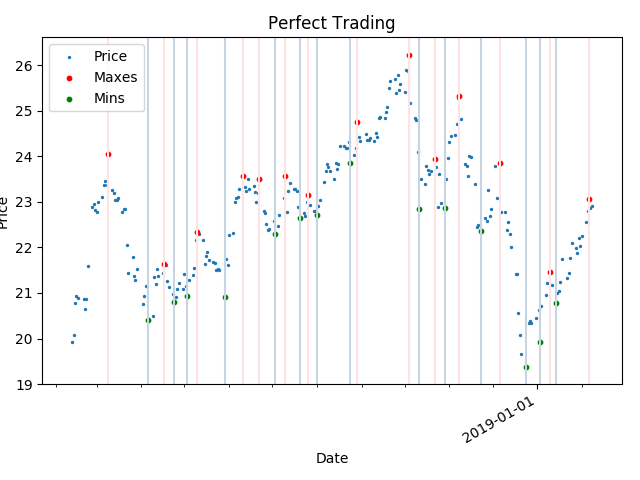

In [3]:
years = mdates.YearLocator()  # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()
yearsFmt = mdates.DateFormatter('%Y-%m-%d')
fig = plt.figure()
ax = fig.add_subplot(111)
for date in mins_dates:
    ax.axvline(date, color=[.78, .83, .89, 1.0])
for date in maxes_dates:
    ax.axvline(date, color=[1.0, .89, .89, 1.0])
ax.scatter(dates, scatter_data[:, 1].tolist(), label='Price', s=2)
ax.scatter(maxes_dates, maxes_vals.tolist(), label='Maxes', s=10, color='red')
ax.scatter(mins_dates, mins_vals.tolist(), label='Mins', s=10, color='green')



ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')

plt.title('Perfect Trading')

fig.tight_layout()
fig.subplots_adjust(hspace=0)
fig.autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [5]:
start_money = 10000.
current_money = start_money
shares = 0.
for i, current_adjusted_close in enumerate(df['adjusted_close']):
    if i > 0:
        #buy signal
        if dates[i] in mins_dates:
            buying = np.floor(current_money / current_adjusted_close)
            shares += buying
            current_money -= buying * current_adjusted_close
        elif dates[i] in maxes_dates:
            current_money += current_adjusted_close * shares
            shares = 0

#sell all of our shares left over at the current price to get the value at the end
end_price = df['adjusted_close'][df.index[-1]]
extra_money = shares * end_price
current_money += extra_money

#calculate buy and hold
start_price = df['adjusted_close'].loc[0]
start_shares = np.floor(start_money / start_price)
bnh_current_money = start_money - (start_shares * start_price)
end_money = end_price * start_shares
end_money += bnh_current_money


print("Perfect Trading: $" + str(current_money))
print("Buy and Hold: $" + str(end_money))
diff = current_money - end_money
print("Perfect vs Buy and Hold: " + "+"+str(diff) if diff > 0 else diff )
print("Profit: " + (str(current_money - start_money)))
print("Number of Trades: " + str(len(mins_dates) + len(maxes_dates)))

Perfect Trading: $22996.1306
Buy and Hold: $11507.6566
Perfect vs Buy and Hold: +11488.474
Profit: 12996.1306
Number of Trades: 28
